# Modelling the Data with Random Forest

In [2]:
# import libraries
from dotenv import load_dotenv, find_dotenv
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# modelling libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix

# define project root directory
PROJ_ROOT = os.path.join(os.pardir)

# define source directory
src_dir = os.path.join(PROJ_ROOT, "src")
sys.path.append(src_dir)

# import my tokenizer
from features.build_features import clean_and_tokenize

# import my visual tools
from visualization.visualize import plot_confusion_matrix, draw_roc_curve

In [3]:
# load the data
df = pd.read_csv(os.path.join(PROJ_ROOT, 'data', 'processed','clinic_train_data.csv'), index_col=0)

# define text feature
text = df.text.values

# define target
target = df.readmission.values
    
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    text, target, stratify=target, test_size=0.33, random_state=42)

In [7]:
from sklearn.metrics import roc_auc_score

def random_forest_undersampler(train_features, test_features, labels, random_state=42, vec_params=None, rf_params=None):
    '''
    A function to classify text data using count vectorization, random under-sampling,
    and a random forest. Returns an array of predicted labels.
    
    train_features = an array of training features
    test_features = an array of testing features
    labels = an array of training labels
    vec_params = parameters for the CountVectorizer
    rf_params = parameters for the RandomForestClassifier
    '''
    
    pipe_rf = make_pipeline_imb(CountVectorizer(**vec_params),
                                RandomUnderSampler(random_state=random_state),
                                RandomForestClassifier(**rf_params))
    
    pipe_rf_fit = pipe_rf.fit(train_features, labels)
    y_pred_rf = pipe_rf_fit.predict(test_features)
    
    return pipe_rf_fit, y_pred_rf

vec_params = {'max_features': 3000, 'tokenizer': clean_and_tokenize, 'stop_words': 'english'}
rf_params = {'n_estimators':200, 'max_depth':3, 'random_state':42}

model, preds = random_forest_undersampler(X_train, X_test, y_train, vec_params=vec_params, rf_params=rf_params)

rocauc = roc_auc_score(y_test, preds)

# print ROC-AUC
print('ROC-AUC: {:.4f}'.format(rocauc))

# print metrics summary
print(classification_report_imbalanced(y_test, preds))

ROC-AUC: 0.6388
                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.66      0.62      0.78      0.64      0.41     11097
          1       0.10      0.62      0.66      0.18      0.64      0.41       711

avg / total       0.91      0.66      0.62      0.75      0.64      0.41     11808



Confusion matrix, without normalization
[[7325 3772]
 [ 272  439]]


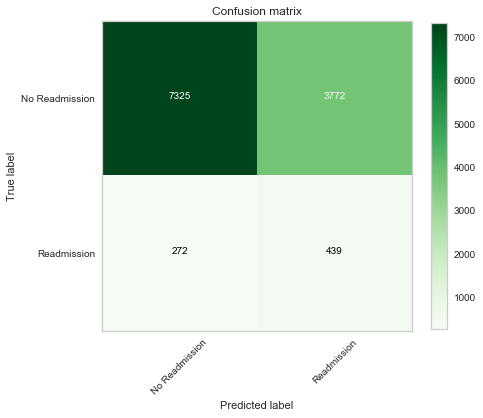

In [8]:
from sklearn.metrics import confusion_matrix

# draw confusion matrix
cnf_matrix = confusion_matrix(y_test, preds)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=['No Readmission','Readmission'],
                      title='Confusion matrix', cmap=plt.cm.Greens)

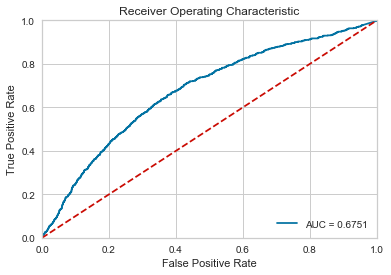

In [10]:
# draw ROC curve
draw_roc_curve(model=model, features=X_test, target=y_test)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.66      0.62      0.78      0.64      0.41     11097
          1       0.10      0.62      0.66      0.18      0.64      0.41       711

avg / total       0.91      0.66      0.63      0.75      0.64      0.41     11808

Confusion matrix, without normalization
[[7315 3782]
 [ 268  443]]


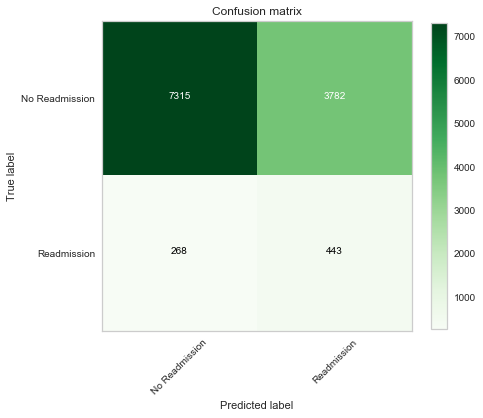

In [12]:
rf_params2 = {'n_estimators':500, 'max_depth':3, 'random_state':42}

model2, preds2 = random_forest_undersampler(X_train, X_test, y_train, vec_params=vec_params, rf_params=rf_params2)

# print metrics summary
print(classification_report_imbalanced(y_test, preds2))

# draw confusion matrix
cnf_matrix2 = confusion_matrix(y_test, preds2)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix2, classes=['No Readmission','Readmission'],
                      title='Confusion matrix', cmap=plt.cm.Greens)

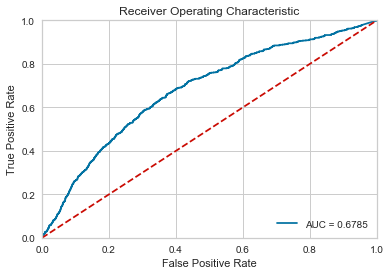

In [13]:
# draw ROC curve
draw_roc_curve(model=model2, features=X_test, target=y_test)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.66      0.62      0.78      0.64      0.41     11097
          1       0.10      0.62      0.66      0.18      0.64      0.41       711

avg / total       0.91      0.66      0.62      0.75      0.64      0.41     11808

Confusion matrix, without normalization
[[7313 3784]
 [ 270  441]]


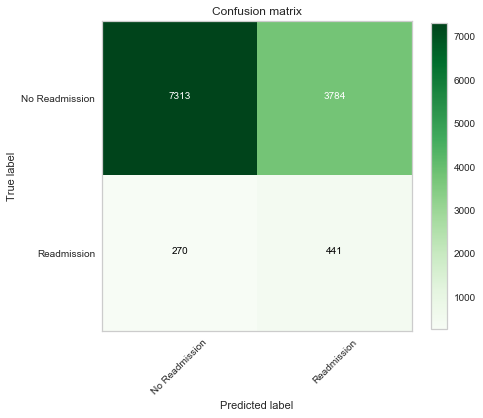

In [14]:
rf_params3 = {'n_estimators':750, 'max_depth':3, 'random_state':42}

model3, preds3 = random_forest_undersampler(X_train, X_test, y_train, vec_params=vec_params, rf_params=rf_params3)

# print metrics summary
print(classification_report_imbalanced(y_test, preds3))

# draw confusion matrix
cnf_matrix3 = confusion_matrix(y_test, preds3)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix3, classes=['No Readmission','Readmission'],
                      title='Confusion matrix', cmap=plt.cm.Greens)

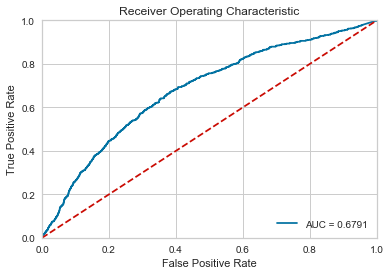

In [15]:
# draw ROC curve
draw_roc_curve(model=model3, features=X_test, target=y_test)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.64      0.67      0.77      0.66      0.43     11097
          1       0.11      0.67      0.64      0.18      0.66      0.43       711

avg / total       0.92      0.64      0.67      0.73      0.66      0.43     11808

Confusion matrix, without normalization
[[7069 4028]
 [ 232  479]]


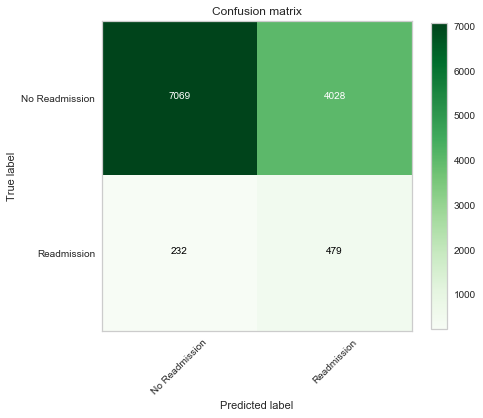

In [19]:
rf_params4 = {'n_estimators':500, 'max_depth':10, 'random_state':42}

model4, preds4 = random_forest_undersampler(X_train, X_test, y_train, vec_params=vec_params, rf_params=rf_params4)

# print metrics summary
print(classification_report_imbalanced(y_test, preds4))

# draw confusion matrix
cnf_matrix4 = confusion_matrix(y_test, preds4)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix4, classes=['No Readmission','Readmission'],
                      title='Confusion matrix', cmap=plt.cm.Greens)

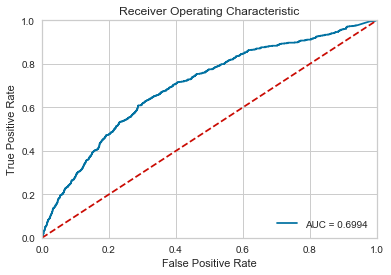

In [20]:
# draw ROC curve
draw_roc_curve(model=model4, features=X_test, target=y_test)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.61      0.71      0.75      0.66      0.43     11097
          1       0.11      0.71      0.61      0.18      0.66      0.44       711

avg / total       0.92      0.62      0.70      0.72      0.66      0.43     11808

Confusion matrix, without normalization
[[6818 4279]
 [ 208  503]]


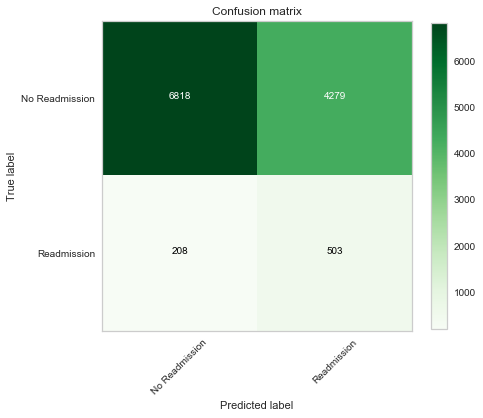

In [21]:
rf_params5 = {'n_estimators':500, 'max_depth':25, 'random_state':42}

model5, preds5 = random_forest_undersampler(X_train, X_test, y_train, vec_params=vec_params, rf_params=rf_params5)

# print metrics summary
print(classification_report_imbalanced(y_test, preds5))

# draw confusion matrix
cnf_matrix5 = confusion_matrix(y_test, preds5)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix5, classes=['No Readmission','Readmission'],
                      title='Confusion matrix', cmap=plt.cm.Greens)

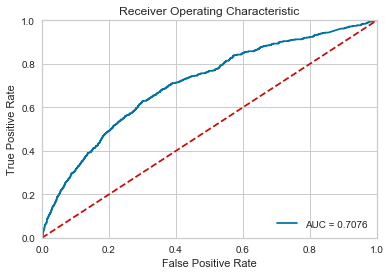

In [22]:
# draw ROC curve
draw_roc_curve(model=model5, features=X_test, target=y_test)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.60      0.71      0.74      0.66      0.43     11097
          1       0.10      0.71      0.60      0.18      0.66      0.44       711

avg / total       0.92      0.61      0.71      0.71      0.66      0.43     11808

Confusion matrix, without normalization
[[6707 4390]
 [ 203  508]]


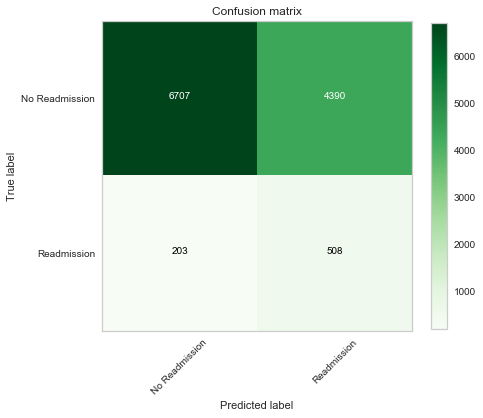

In [23]:
rf_params6 = {'n_estimators':500, 'max_depth':50, 'random_state':42}

model6, preds6 = random_forest_undersampler(X_train, X_test, y_train, vec_params=vec_params, rf_params=rf_params6)

# print metrics summary
print(classification_report_imbalanced(y_test, preds6))

# draw confusion matrix
cnf_matrix6 = confusion_matrix(y_test, preds6)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix6, classes=['No Readmission','Readmission'],
                      title='Confusion matrix', cmap=plt.cm.Greens)

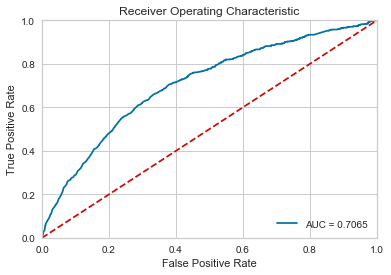

In [24]:
# draw ROC curve
draw_roc_curve(model=model6, features=X_test, target=y_test)

### Random Forest with TF-IDF

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.64      0.65      0.77      0.65      0.42     11097
          1       0.11      0.65      0.64      0.18      0.65      0.42       711

avg / total       0.91      0.64      0.65      0.74      0.65      0.42     11808

Confusion matrix, without normalization
[[7146 3951]
 [ 247  464]]


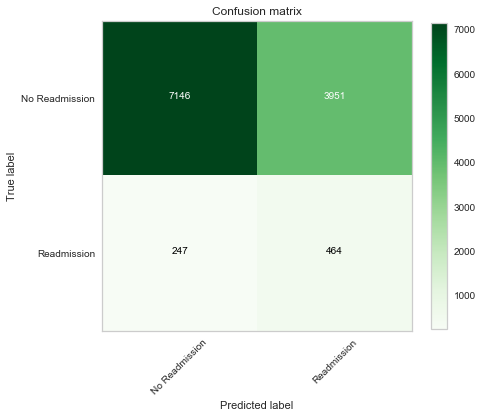

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer

pipe_rf2 = make_pipeline_imb(CountVectorizer(**vec_params),
                            TfidfTransformer(),
                            RandomUnderSampler(random_state=42),
                            RandomForestClassifier(**rf_params2))

pipe_rf2_fit = pipe_rf2.fit(X_train, y_train)
y_pred_rf2 = pipe_rf2_fit.predict(X_test)

# print metrics summary
print(classification_report_imbalanced(y_test, y_pred_rf2))

# draw confusion matrix
cnf_matrix_tf = confusion_matrix(y_test, y_pred_rf2)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_tf, classes=['No Readmission','Readmission'],
                      title='Confusion matrix', cmap=plt.cm.Greens)


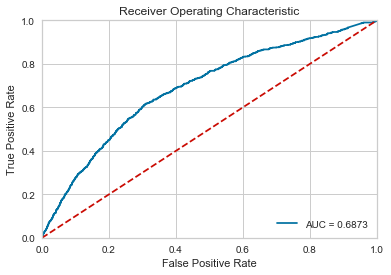

In [18]:
# draw ROC curve
draw_roc_curve(model=pipe_rf2_fit, features=X_test, target=y_test)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.65      0.68      0.77      0.66      0.44     11097
          1       0.11      0.68      0.65      0.19      0.66      0.44       711

avg / total       0.92      0.65      0.68      0.74      0.66      0.44     11808

Confusion matrix, without normalization
[[7162 3935]
 [ 228  483]]


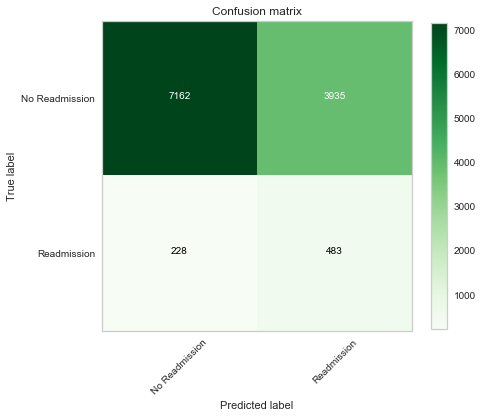

In [25]:
pipe_rf3 = make_pipeline_imb(CountVectorizer(**vec_params),
                            TfidfTransformer(),
                            RandomUnderSampler(random_state=42),
                            RandomForestClassifier(**rf_params5))

pipe_rf3_fit = pipe_rf3.fit(X_train, y_train)
y_pred_rf3 = pipe_rf3_fit.predict(X_test)

# print metrics summary
print(classification_report_imbalanced(y_test, y_pred_rf3))

# draw confusion matrix
cnf_matrix_tf3 = confusion_matrix(y_test, y_pred_rf3)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_tf3, classes=['No Readmission','Readmission'],
                      title='Confusion matrix', cmap=plt.cm.Greens)


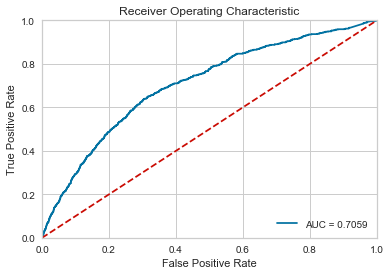

In [26]:
# draw ROC curve
draw_roc_curve(model=pipe_rf3_fit, features=X_test, target=y_test)